# Independent Set with size m

In [3]:
!pip install pygad

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygad

## pass the input file path as an argument to function `load_input`

In [5]:
def load_input(file_name):
    with open(file_name, "r") as f:
        lines_all = f.readlines()
    lines = []
    for l in lines_all:
        lines.append(l.strip("\n"))
    
    m = int(lines[0])
    n = len(lines[1].split())
    arr = []
    for i in range(1, n+1):
        arr.append( [int(x) for x in lines[i].split()] )
    return m, np.array(arr)

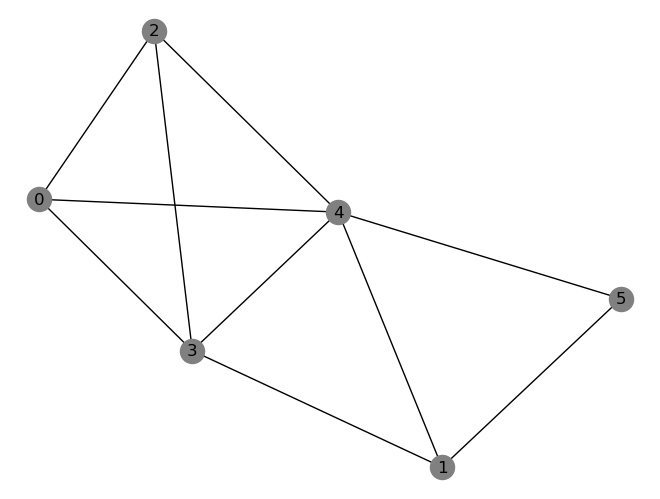

In [8]:

""" You can change the file name here """
k , graph = load_input('Q1_input.txt')
nx.draw(nx.from_numpy_array(graph),node_color='grey', with_labels=True)


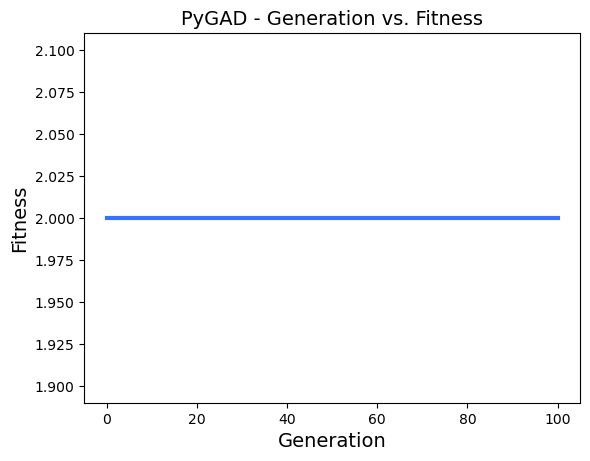

100
2.0
Parameters of the best solution : [0. 1. 1. 0. 0. 0.]
Fitness value of the best solution = 2.0


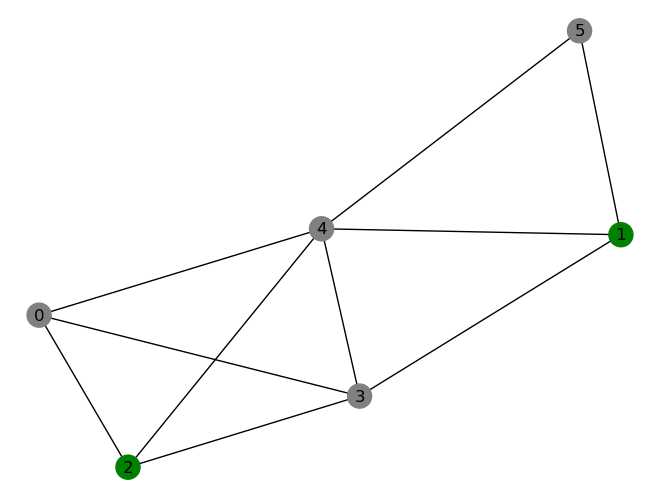

In [9]:

fitness_function= lambda solution, solution_idx: sum([solution[i]-len(solution)*solution[i]*sum([solution[j]*graph[i][j] for j in range(i,len(solution))]) for i in range(len(solution))])

num_generations = 100
num_parents_mating = 2

sol_per_pop = 64
num_genes = len(graph[0])


gene_space=[0,1]

parent_selection_type = "sss"
keep_parents = 1
keep_elitism=1

crossover_type = "two_points"
crossover_probability=0.5

mutation_type = "random"
mutation_probability=0.05
mutation_percent_genes = "default"#10
stop_criteria=f"reach_{k}"

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       crossover_probability=crossover_probability,
                       mutation_probability=mutation_probability,
                       keep_elitism=keep_elitism,
                       stop_criteria=stop_criteria)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()


solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(ga_instance.generations_completed)
print(sum(solution))
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

nx.draw(nx.from_numpy_array(graph),node_color=['green' if item==1 else 'grey' for item in solution], with_labels=True)


## Writing the found solution to `Q1_output.txt`

In [11]:
lines =list(np.where(solution == 1)[0])
with open('Q1_output.txt', 'w') as f:
    for line in lines:
        f.write(str(line))
        f.write('\n')
